# PART A

# 1. A) Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [1]:
#importing all the necessary mathematical, data handling & visulaization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import zscore
from collections import Counter

In [2]:
df_tel1 = pd.read_csv('TelcomCustomer-Churn_1.csv')                      #Answer

In [3]:
df_tel1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [4]:
df_tel1.shape

(7043, 10)

# 1. B) Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [5]:
df_tel2 = pd.read_csv('TelcomCustomer-Churn_2.csv')                              #Answer

In [6]:
df_tel2.shape

(7043, 12)

# 1. C) Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [7]:
df1_tel_merged = pd.merge(df_tel1, df_tel2, how= 'outer', on= 'customerID' )     #Answer 

In [8]:
df1_tel_merged.shape

(7043, 21)

In [9]:
df1_tel_merged.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  

[2 rows x 21 columns]

In [10]:
df1_tel_merged.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 1. D) Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

In [11]:
df1_tel_merged.columns == df1_tel_merged.columns                       #Answer

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [14]:
df1_tel_merged == df1_tel_merged.columns

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
5          False   False          False    False       False   False   
6          False   False          False    False       False   False   
7          False   False          False    False       False   False   
8          False   False          False    False       False   False   
9          False   False          False    False       False   False   
10         False   False          False    False       False   False   
11         False   False          False    False       False   False   
12         False   False          False    False       False   False   
13         False   False          False    False       False   False   
14         False   False          False    False       False   False   
15         False   False          False    False       False   False   
16         False   False          False    False       False   False   
17         False   False          False    False       False   False   
18         False   False          False    False       False   False   
19         False   False          False    False       False   False   
20         False   False          False    False       False   False   
21         False   False          False    False       False   False   
22         False   False          False    False       False   False   
23         False   False          False    False       False   False   
24         False   False          False    False       False   False   
25         False   False          False    False       False   False   
26         False   False          False    False       False   False   
27         False   False          False    False       False   False   
28         False   False          False    False       False   False   
29         False   False          False    False       False   False   
30         False   False          False    False       False   False   
31         False   False          False    False       False   False   
32         False   False          False    False       False   False   
33         False   False          False    False       False   False   
34         False   False          False    False       False   False   
35         False   False          False    False       False   False   
36         False   False          False    False       False   False   
37         False   False          False    False       False   False   
38         False   False          False    False       False   False   
39         False   False          False    False       False   False   
40         False   False          False    False       False   False   
41         False   False          False    False       False   False   
42         False   False          False    False       False   False   
43         False   False          False    False       False   False   
44         False   False          False    False       False   False   
45         False   False          False    False       False   False   
46         False   False          False    False       False   False   
47         False   False          False    False       False   False   
48         False   False          False    False       False   False   
49         False   False          False    False       False   False   
50         False   False          False    False       False   False   
51         False   False          False    False       False   False   
52         False   False          False    False       False   False   
53         False   False          False    False       False   False   
54         False   False          False    Fal

# 2. A) Impute missing/unexpected values in the DataFrame.

In [15]:
df1_tel_merged.isnull().sum()                                 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df1_tel_merged.empty

False

In [17]:
df1_tel_merged.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

In [18]:
print('There are no null values in the dataframe, but we can see there are empty strings in the TotalCharges column in these locations 488,753,936,1082,1340,3331,3826,4380,5218,6670,6754 ')

There are no null values in the dataframe, but we can see there are empty strings in the TotalCharges column in these locations 488,753,936,1082,1340,3331,3826,4380,5218,6670,6754 


In [19]:
#df1_tel_merged.replace('', np.nan)

In [20]:
#df1_tel_merged['TotalCharges'].mean()

In [21]:
df1_tel_merged = df1_tel_merged.replace(r'^\s*$', np.nan, regex= True) #Answer - Replacing the empty strings values with NaN values

In [22]:
df1_tel_merged.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55           NaN    No  
753                Mailed check          20.25           NaN    No  
936                Mailed check          80.85           NaN    No  
1082               Mailed check          25.75           NaN    No  
1340    Credit card (automatic)          56.05           NaN    No  
3331               Mailed check          19.85           NaN    No  
3826               Mailed check          25.35           NaN    No  
4380               Mailed check          20.00           NaN    No  
5218               Mailed check          19.7

In [23]:
df1_tel_merged.isna().sum()  # We replaced null values in TotalCharges column wherever empty strings were there. Total there are 11 records

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
df1_tel_merged['TotalCharges'].replace(np.nan, 2283, inplace= True) #Answer - Imputing average value of 2283 NaN values

In [25]:
df1_tel_merged.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55          2283    No  
753                Mailed check          20.25          2283    No  
936                Mailed check          80.85          2283    No  
1082               Mailed check          25.75          2283    No  
1340    Credit card (automatic)          56.05          2283    No  
3331               Mailed check          19.85          2283    No  
3826               Mailed check          25.35          2283    No  
4380               Mailed check          20.00          2283    No  
5218               Mailed check          19.7

# 2. B) Make sure all the variables with continuous values are of ‘Float’ type

In [23]:
df1_tel_merged.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [24]:
df1_tel_merged.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  

[2 rows x 21 columns]

In [25]:
df1_tel_merged._get_numeric_data().columns                       #Also, total charges is also a continuous variable as it has lot of float values

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [27]:
df1_tel_merged = df1_tel_merged.astype({'tenure': 'float64',         #Answer
                                        'SeniorCitizen': 'float64',
                                        'MonthlyCharges': 'float64',
                                        'TotalCharges' : 'float64'})

In [27]:
df1_tel_merged.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# 2. C) Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart

In [28]:
df1_tel_merged.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No     1.0           No   
1  5575-GNVDE    Male            0.0      No         No    34.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  
1      Mailed check          56.95       1889.50     No  

[2 rows x 21 columns]

In [29]:
print(Counter(df1_tel_merged['MultipleLines']))

Counter({'No': 3390, 'Yes': 2971, 'No phone service': 682})


In [30]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [31]:
#StreamingTV_type = telecomcustomer_merged_df.groupby('StreamingTV').agg('count')
#MultipleLines = telecomcustomer_merged_df.groupby('MultipleLines').agg('count')
#PaymentMethod = telecomcustomer_merged_df.groupby('PaymentMethod').agg('count')
#InternetService = telecomcustomer_merged_df.groupby('InternetService').agg('count')
#Dependents = telecomcustomer_merged_df.groupby('Dependents').agg('count')
#StreamingMovies = telecomcustomer_merged_df.groupby('StreamingMovies').agg('count')
#Contract = telecomcustomer_merged_df.groupby('Contract').agg('count')
#OnlineBackup = telecomcustomer_merged_df.groupby('OnlineBackup').agg('count')
#DeviceProtection = telecomcustomer_merged_df.groupby('DeviceProtection').agg('count')
#TechSupport = telecomcustomer_merged_df.groupby('TechSupport').agg('count')
#Partner = telecomcustomer_merged_df.groupby('Partner').agg('count')
#PaperlessBilling = telecomcustomer_merged_df.groupby('PaperlessBilling').agg('count')
#PhoneService = telecomcustomer_merged_df.groupby('PhoneService').agg('count')
#Churn = telecomcustomer_merged_df.groupby('Churn').agg('count')
#gender = telecomcustomer_merged_df.groupby('gender').agg('count')
#OnlineSecurity = telecomcustomer_merged_df.groupby('OnlineSecurity').agg('count')

In [39]:
def telecomcustomer_merged_df_pie_chart_function(x):                       #Answer
    num_cols = x._get_numeric_data().columns 
    num_cols = set(num_cols)
    normal_cols = set(x.columns)
    cat_cols = list(normal_cols - num_cols)
    cat_cols.remove('customerID')
    print(cat_cols)
    
    
    for feature in cat_cols[0:16]:
        feature_type = df1_tel_merged.groupby(feature).agg('count')
        feature_labels = feature_type.customerID.sort_values().index
        feature_counts = feature_type.customerID.sort_values()
        print('\n')
        print(feature_labels)
        print('\n')
        print(feature_counts)
        
        plt.figure(1, figsize=(40,20)) 
        the_grid = GridSpec(2, 2)
        cmap = plt.get_cmap('Accent')
        colors = [cmap(i) for i in np.linspace(0, 1, 8)]
        
        title_categorical_column_set = {'StreamingTV'      : 'Types of StreamingTV',
                                        'MultipleLines'    : 'Types of MultipleLines',
                                        'PaymentMethod'    : 'Types of payment method',
                                        'InternetService'  : 'Types of InternetService',
                                        'Dependents'       : 'Types of Dependents',
                                        'StreamingMovies'  : 'Types of StreamingMovies',
                                        'Contract'         : 'Types of Contracts',
                                        'OnlineBackup'     : 'Types of OnlineBackup',
                                        'DeviceProtection' : 'Types of DeviceProtection',
                                        'TechSupport'      : 'Types of TechSupport',
                                        'Partner'          : 'Partner',
                                        'PaperlessBilling' : 'Types of PaperlessBilling',
                                        'PhoneService'     : 'Types of PhoneService',
                                        'Churn'            : 'Types of churn',
                                        'gender'           : 'Types of gender',
                                        'OnlineSecurity'   : 'Types of OnlineSecurity'}
                
        plt.subplot(the_grid[0, 1], aspect=1, title= title_categorical_column_set[feature])
        type_feature = plt.pie(feature_counts, labels= feature_labels, autopct='%1.1f%%', shadow=True, colors=colors)
        plt.show()  
        print('*************************************************************************************************************')
        
        

['Dependents', 'Contract', 'PaperlessBilling', 'OnlineBackup', 'InternetService', 'StreamingMovies', 'OnlineSecurity', 'PhoneService', 'TechSupport', 'gender', 'StreamingTV', 'MultipleLines', 'DeviceProtection', 'Churn', 'PaymentMethod', 'Partner']


Index(['Yes', 'No'], dtype='object', name='Dependents')


Dependents
Yes    2110
No     4933
Name: customerID, dtype: int64


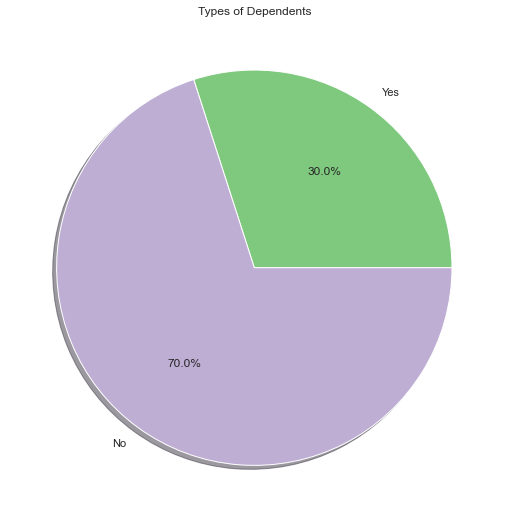

*************************************************************************************************************


Index(['One year', 'Two year', 'Month-to-month'], dtype='object', name='Contract')


Contract
One year          1473
Two year          1695
Month-to-month    3875
Name: customerID, dtype: int64


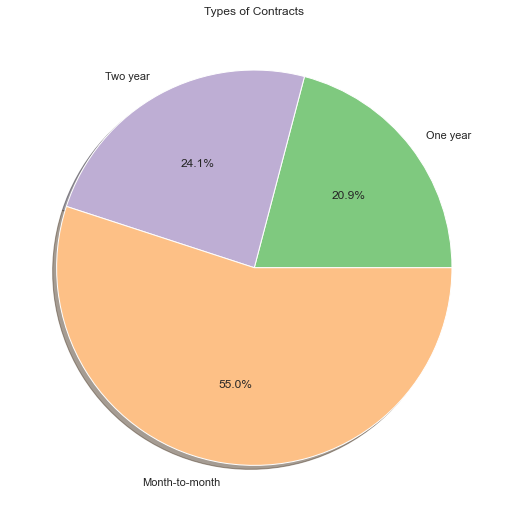

*************************************************************************************************************


Index(['No', 'Yes'], dtype='object', name='PaperlessBilling')


PaperlessBilling
No     2872
Yes    4171
Name: customerID, dtype: int64


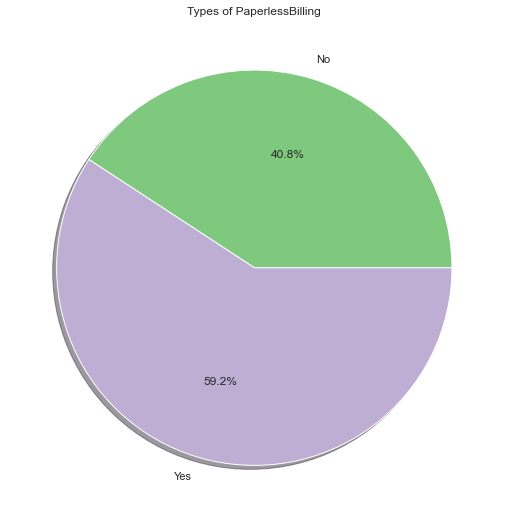

*************************************************************************************************************


Index(['No internet service', 'Yes', 'No'], dtype='object', name='OnlineBackup')


OnlineBackup
No internet service    1526
Yes                    2429
No                     3088
Name: customerID, dtype: int64


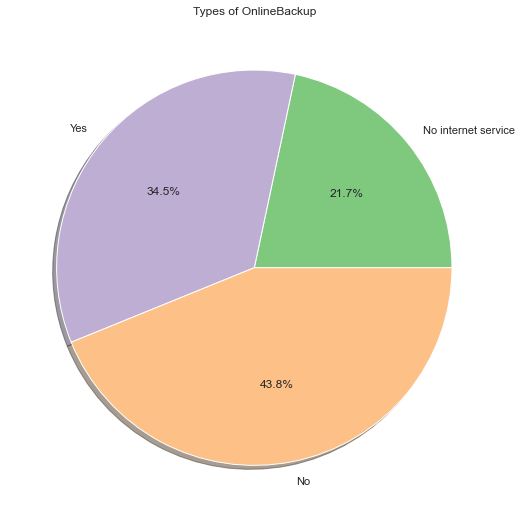

*************************************************************************************************************


Index(['No', 'DSL', 'Fiber optic'], dtype='object', name='InternetService')


InternetService
No             1526
DSL            2421
Fiber optic    3096
Name: customerID, dtype: int64


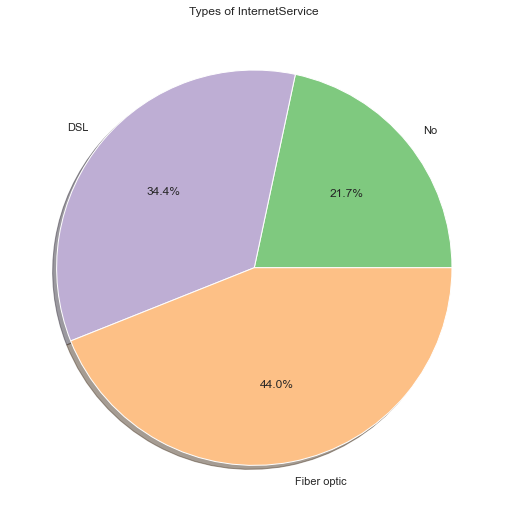

*************************************************************************************************************


Index(['No internet service', 'Yes', 'No'], dtype='object', name='StreamingMovies')


StreamingMovies
No internet service    1526
Yes                    2732
No                     2785
Name: customerID, dtype: int64


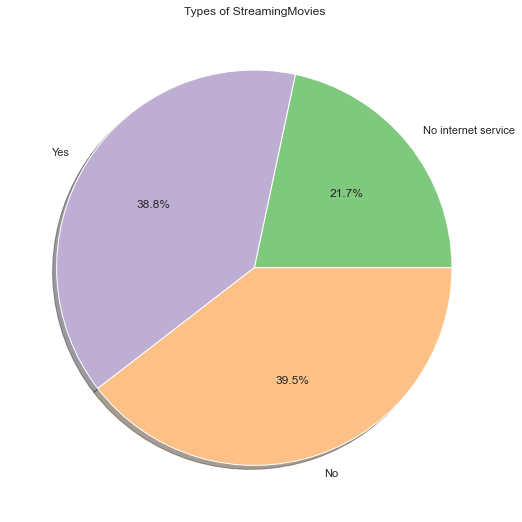

*************************************************************************************************************


Index(['No internet service', 'Yes', 'No'], dtype='object', name='OnlineSecurity')


OnlineSecurity
No internet service    1526
Yes                    2019
No                     3498
Name: customerID, dtype: int64


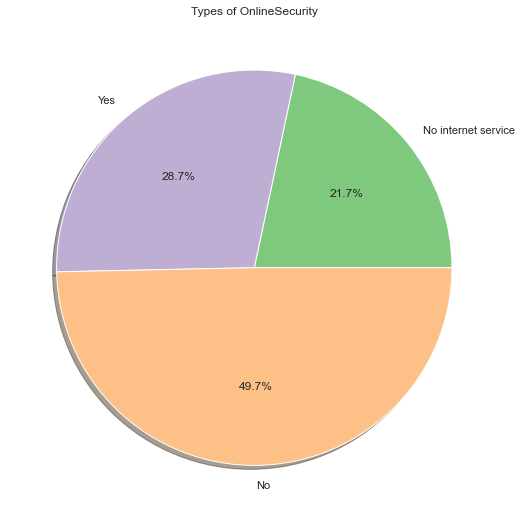

*************************************************************************************************************


Index(['No', 'Yes'], dtype='object', name='PhoneService')


PhoneService
No      682
Yes    6361
Name: customerID, dtype: int64


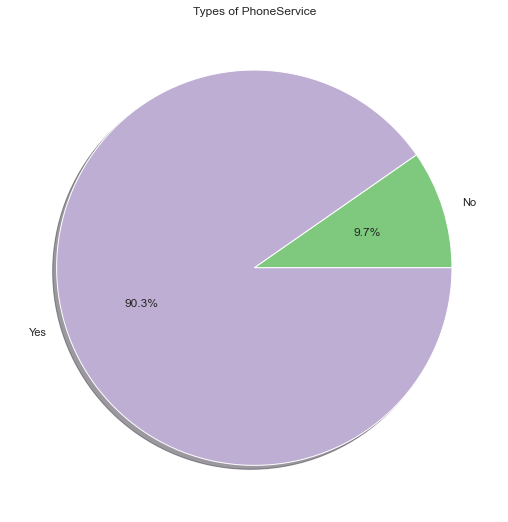

*************************************************************************************************************


Index(['No internet service', 'Yes', 'No'], dtype='object', name='TechSupport')


TechSupport
No internet service    1526
Yes                    2044
No                     3473
Name: customerID, dtype: int64


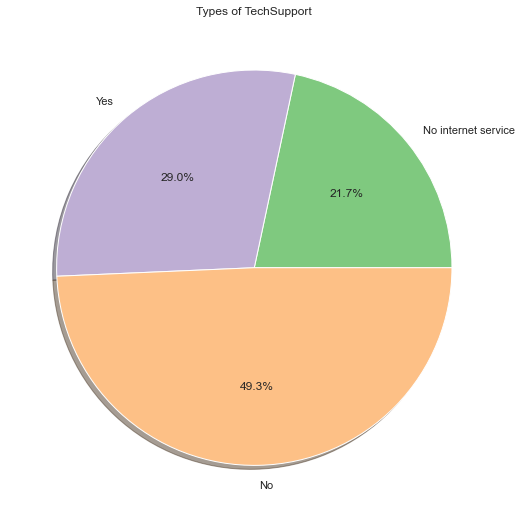

*************************************************************************************************************


Index(['Female', 'Male'], dtype='object', name='gender')


gender
Female    3488
Male      3555
Name: customerID, dtype: int64


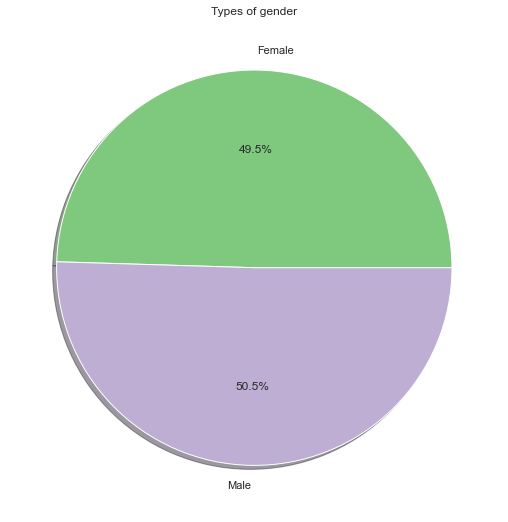

*************************************************************************************************************


Index(['No internet service', 'Yes', 'No'], dtype='object', name='StreamingTV')


StreamingTV
No internet service    1526
Yes                    2707
No                     2810
Name: customerID, dtype: int64


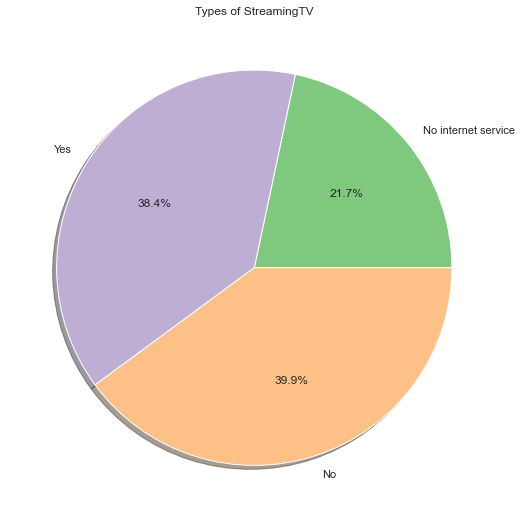

*************************************************************************************************************


Index(['No phone service', 'Yes', 'No'], dtype='object', name='MultipleLines')


MultipleLines
No phone service     682
Yes                 2971
No                  3390
Name: customerID, dtype: int64


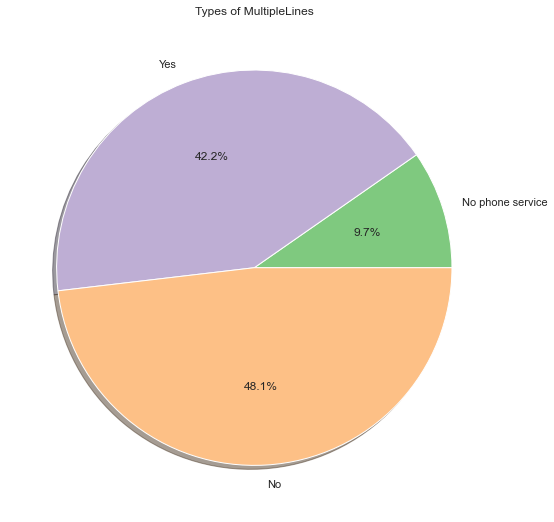

*************************************************************************************************************


Index(['No internet service', 'Yes', 'No'], dtype='object', name='DeviceProtection')


DeviceProtection
No internet service    1526
Yes                    2422
No                     3095
Name: customerID, dtype: int64


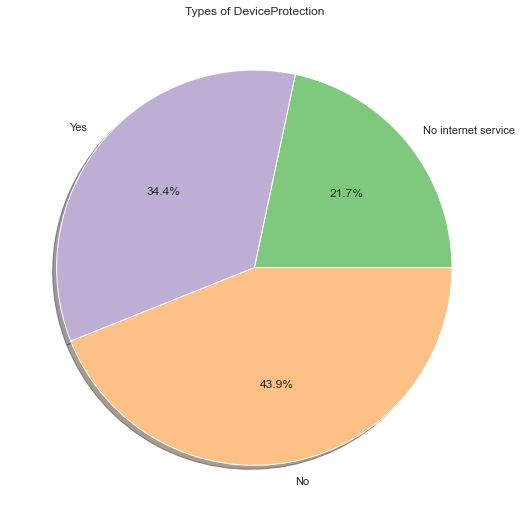

*************************************************************************************************************


Index(['Yes', 'No'], dtype='object', name='Churn')


Churn
Yes    1869
No     5174
Name: customerID, dtype: int64


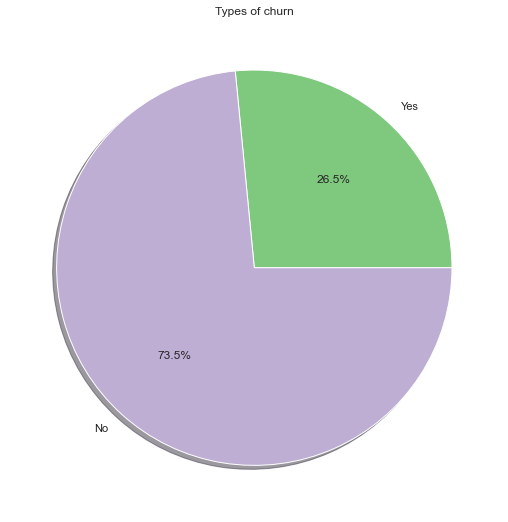

*************************************************************************************************************


Index(['Credit card (automatic)', 'Bank transfer (automatic)', 'Mailed check',
       'Electronic check'],
      dtype='object', name='PaymentMethod')


PaymentMethod
Credit card (automatic)      1522
Bank transfer (automatic)    1544
Mailed check                 1612
Electronic check             2365
Name: customerID, dtype: int64


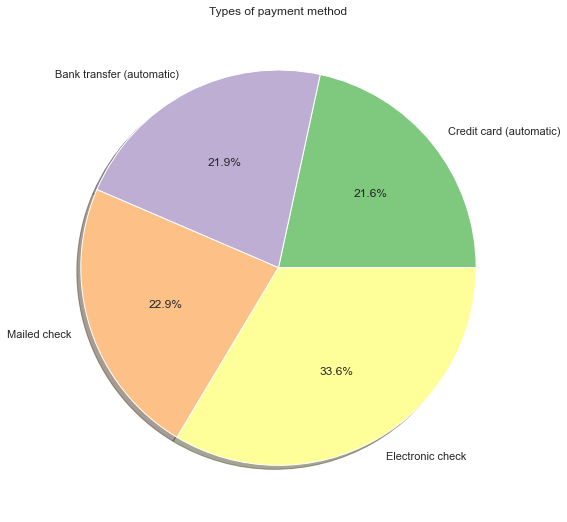

*************************************************************************************************************


Index(['Yes', 'No'], dtype='object', name='Partner')


Partner
Yes    3402
No     3641
Name: customerID, dtype: int64


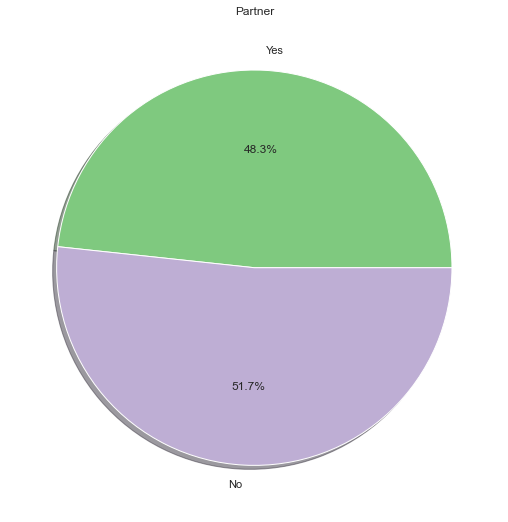

*************************************************************************************************************


In [40]:
telecomcustomer_merged_df_pie_chart_function(df1_tel_merged)

# 2. D) Share insights for Q2.c.

In [41]:
#Answer
print('1. For StreamingTV, more than 50 % customers dont have streaming service nor they have internet connection')
print('\n')
print('2. For Multiple Lines, almost 58 % customers neither have phone service nor have any multiple lines connections')
print('\n')
print('3. For Payment method, multiple customers use different ways to pay, but majority of them use electronic check clearence')
print('\n')
print('4. For Internet Service, around  78 % customers use internet service where Fibre Optic is most used having 34%')
print('\n')
print('5. For Dependents, around  70 % customers are non dependents and are single operated. 30 % use sharing option and have dependents')
print('\n')
print('6. For Streaming Movies, almost 61 % customers neither have internet service nor have streaming movies subscription')
print('\n')
print('7. For Contract, around 55% customers use monthly plans/contracts and 45% have long term plans like 1 year/2years')
print('\n')
print('8. For Online Backup, around 35% customers only have online backups')
print('\n')
print('9. For Device protection, around 35% customers only have opted for device protection and rest neither have internet service nor have device protection ') 
print('\n')
print('10. For Tech support, only 29% customer have opted for tech support ')
print('\n')
print('11. For Partner, there is nearly 50 - 50 % proportion')
print('\n')
print('12. For Paperless Billing, 60% customer opted for paperless bills')
print('\n')
print('13. For Phone Service, mojority of people have phone service enabled - 90%')
print('\n')
print('14. For Churn, almost 75% people have not left their existing service but 25% have left the service')
print('\n')
print('15. For gender, there is nearly 50 - 50 % proportion between Males and Females')
print('\n')
print('16. For Online Security, 70% neither have internet service nor have opted for the security service')    

1. For StreamingTV, more than 50 % customers dont have streaming service nor they have internet connection


2. For Multiple Lines, almost 58 % customers neither have phone service nor have any multiple lines connections


3. For Payment method, multiple customers use different ways to pay, but majority of them use electronic check clearence


4. For Internet Service, around  78 % customers use internet service where Fibre Optic is most used having 34%


5. For Dependents, around  70 % customers are non dependents and are single operated. 30 % use sharing option and have dependents


6. For Streaming Movies, almost 61 % customers neither have internet service nor have streaming movies subscription


7. For Contract, around 55% customers use monthly plans/contracts and 45% have long term plans like 1 year/2years


8. For Online Backup, around 35% customers only have online backups


9. For Device protection, around 35% customers only have opted for device protection and rest neither hav

# 2. E) Encode all the appropriate Categorical features with the best suitable approach.

In [42]:
replace_structure = {'gender'          : {'Male' : 0, 'Female' : 1},
                     'Partner'         : {'Yes' : 1, 'No' : 0},
                     'Dependents'      : {'Yes' : 1, 'No' : 0},
                     'PhoneService'    : {'Yes' : 1, 'No' :0},
                     'MultipleLines'   : {'No phone service' : -1, 'Yes' : 1, 'No' : 0},
                     'InternetService' : {'No' : 0, 'DSL' : 1, 'Fiber optic' : 2},
                     'OnlineSecurity'  : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'DeviceProtection' : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'TechSupport'     : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'StreamingTV'     : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'StreamingMovies' : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'Contract'        : {'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2},
                     'OnlineBackup'    : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'PaperlessBilling': {'Yes' : 1, 'No' :0},
                     'PaymentMethod'   : {'Electronic check' : 0, 'Mailed check' : 1, 'Bank transfer (automatic)' : 2, 'Credit card (automatic)' : 3},
                     'Churn'           : {'Yes' : 1, 'No' :0} }
                     

In [43]:
df1_tel_merged = df1_tel_merged.replace(replace_structure)           #Answer - All the values are encoded with single digits

In [44]:
df1_tel_merged.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1            0.0        1           0     1.0   
1  5575-GNVDE       0            0.0        0           0    34.0   
2  3668-QPYBK       0            0.0        0           0     2.0   
3  7795-CFOCW       0            0.0        0           0    45.0   
4  9237-HQITU       1            0.0        0           0     2.0   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0             -1                1               0  ...   
1             1              0                1               1  ...   
2             1              0                1               1  ...   
3             0             -1                1               1  ...   
4             1              0                2               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              0           29.85         29.85      0  
1                 0              1           56.95       1889.50      0  
2                 1              1           53.85        108.15      1  
3                 0              2           42.30       1840.75      0  
4                 1              0           70.70        151.65      1  

[5 rows x 21 columns]

# 2. F) Split the data into 80% train and 20% test

In [45]:
X = df1_tel_merged.drop(labels= ['Churn','customerID'], axis=1)       
y = df1_tel_merged['Churn']

In [46]:
X.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1            0.0        1           0     1.0             0   
1       0            0.0        0           0    34.0             1   
2       0            0.0        0           0     2.0             1   
3       0            0.0        0           0    45.0             0   
4       1            0.0        0           0     2.0             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             -1                1               0             1   
1              0                1               1             0   
2              0                1               1             1   
3             -1                1               1             0   
4              0                2               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              0           29.85         29.85  
1                 0              1           56.95       1889.50  
2                 1              1           53.85        108.15  
3                 0              2           42.30       1840.75  
4                 1              0           70.70        151.65

In [47]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 1 )    #Answer

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 19)
(1409, 19)
(5634,)
(1409,)


# 2. G) Normalize/Standardize the data with the best suitable approach.

In [50]:
# However, random forest/ensemble methods methods won't have impact with outliers, we will still convert the  features data X as a standard approach, as we have some nummerical features like Total Charges which have high values
X_train_scaled = X_train.apply(zscore)              #Answer
X_test_scaled = X_test.apply(zscore)

In [51]:
X_train_scaled.head()

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
1814 -0.992573      -0.439475  1.041692    1.543293 -0.825884      0.327916   
5946  1.007483      -0.439475 -0.959977   -0.647965  0.395961      0.327916   
3881 -0.992573      -0.439475  1.041692   -0.647965  1.577078      0.327916   
2389 -0.992573      -0.439475  1.041692    1.543293  1.577078      0.327916   
3676 -0.992573      -0.439475 -0.959977   -0.647965 -0.092777      0.327916   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1814      -0.507510        -1.570293       -1.515358     -1.526412   
5946      -0.507510        -0.286626        1.318676      1.191604   
3881       1.046464        -0.286626        1.318676      1.191604   
2389       1.046464        -0.286626        1.318676     -0.167404   
3676      -0.507510        -0.286626        1.318676      1.191604   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1814         -1.527759    -1.515762    -1.542669        -1.545217  1.577754   
5946          1.181951     1.309649    -0.221788         1.087704  0.375554   
3881         -0.172904     1.309649    -0.221788        -0.228757  1.577754   
2389          1.181951     1.309649     1.099093         1.087704  0.375554   
3676         -0.172904     1.309649     1.099093        -0.228757  0.375554   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
1814         -1.198248      -0.272022       -1.497530     -0.893019  
5946         -1.198248       1.469537        0.302996      0.388541  
3881         -1.198248       0.598758        0.012320      1.060276  
2389         -1.198248      -1.142802        0.686687      1.775242  
3676         -1.198248      -1.142802        0.186726     -0.104176

In [52]:
X_test_scaled.head()

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
3381  1.017903      -0.441679 -0.993633   -0.678309  0.335987      0.325523   
6180  1.017903       2.264086 -0.993633   -0.678309  1.353363      0.325523   
4829  1.017903      -0.441679 -0.993633   -0.678309 -0.844170      0.325523   
3737  1.017903      -0.441679 -0.993633   -0.678309 -1.129035      0.325523   
4249  1.017903      -0.441679  1.006408    1.474254 -0.925560      0.325523   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
3381      -0.498437        -0.284608        1.311728     -0.198348   
6180       1.065700         1.000688        1.311728     -0.198348   
4829      -0.498437        -0.284608       -0.102369     -0.198348   
3737       1.065700        -0.284608       -0.102369     -0.198348   
4249      -0.498437        -0.284608       -0.102369      1.138841   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
3381          1.186837     1.302779     1.101787         1.113014  0.354396   
6180         -0.170512    -0.107064     1.101787         1.113014  1.543310   
4829         -0.170512    -0.107064    -0.220545        -0.213751 -0.834518   
3737         -0.170512    -0.107064    -0.220545        -0.213751 -0.834518   
4249          1.186837    -0.107064    -0.220545         1.113014  0.354396   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
3381          0.810954       0.583597        0.504761      0.453219  
6180          0.810954       0.583597        1.255673      1.843922  
4829          0.810954       0.583597       -0.655741     -0.780942  
3737          0.810954      -0.285629       -0.469262     -0.902046  
4249          0.810954      -0.285629        0.040227     -0.721053

# 3. A) Train a model using XGBoost. Also print best performing parameters along with train and test performance

In [53]:
import xgboost as xgb  #import xgbost model

In [54]:
xgboost_model_1 = xgb.XGBClassifier()          # Instantiating the model

In [55]:
xgboost_model_1.fit(X_train_scaled, y_train)               # Answer - Fiting/traing the model

C:\Users\user\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:32:29] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
predictions_1 = xgboost_model_1.predict(X_test_scaled)                    # Predicting th results  

In [57]:
print(confusion_matrix(y_test, predictions_1))                                                #Answer
print('\n')
print(classification_report(y_test, predictions_1))

[[923 138]
 [159 189]]


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1061
           1       0.58      0.54      0.56       348

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.79      0.79      0.79      1409



In [58]:
print('We got 79% Accuracy with weighted average 79% in Precision, 79% in recall and 79% in F1-score. However, we can see some imbalance in the classes where 1 has very less data ')

We got 79% Accuracy with weighted average 79% in Precision, 79% in recall and 79% in F1-score. However, we can see some imbalance in the classes where 1 has very less data 


In [59]:
print(xgboost_model_1.score(X_train_scaled, y_train))
print(xgboost_model_1.score(X_test_scaled, y_test))

0.9309549165779197
0.7892122072391767


# 2. B) Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. 

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
xgboost_model_tuning = xgb.XGBClassifier()

In [62]:
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25 ] ,
     "max_depth"        : [ 3, 4, 5, 6],
     "min_child_weight" : [ 1, 3, 5 ],
     "gamma"            : [ 0.0, 0.1],
     "colsample_bytree" : [ 0.3, 0.4],
     "booster"          : ['gbtree']
           }

In [63]:
 xgboost_best_model = GridSearchCV(xgboost_model_tuning,
                                    parameters,
                                    n_jobs=3,
                                    cv=4)

In [64]:
xgboost_best_model.fit(X_train_scaled, y_train)

C:\Users\user\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:36:01] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [65]:
df_xgboost_best_model_results = pd.DataFrame(xgboost_best_model.cv_results_)

In [66]:
df_xgboost_best_model_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_booster  \
0       0.338303      0.006762         0.007813        0.007813        gbtree   
1       0.408897      0.077715         0.013644        0.003282        gbtree   
2       0.568119      0.008748         0.012901        0.001724        gbtree   
3       0.695677      0.108269         0.015220        0.000709        gbtree   
4       0.722823      0.130132         0.012810        0.002903        gbtree   

  param_colsample_bytree param_eta param_gamma param_max_depth  \
0                    0.3      0.05           0               3   
1                    0.3      0.05           0               3   
2                    0.3      0.05           0               3   
3                    0.3      0.05           0               4   
4                    0.3      0.05           0               4   

  param_min_child_weight                                             params  \
0                      1  {'booster': 'gbtree', 'colsample_bytree': 0.3,...   
1                      3  {'booster': 'gbtree', 'colsample_bytree': 0.3,...   
2                      5  {'booster': 'gbtree', 'colsample_bytree': 0.3,...   
3                      1  {'booster': 'gbtree', 'colsample_bytree': 0.3,...   
4                      3  {'booster': 'gbtree', 'colsample_bytree': 0.3,...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.801278           0.796309           0.819602           0.780540   
1           0.800568           0.797019           0.821733           0.781250   
2           0.800568           0.795600           0.820312           0.779119   
3           0.801987           0.797019           0.821023           0.780540   
4           0.801278           0.799858           0.821023           0.779830   

   mean_test_score  std_test_score  rank_test_score  
0         0.799432        0.013937               58  
1         0.800142        0.014431               44  
2         0.798900        0.014692               74  
3         0.800142        0.014434               46  
4         0.800497        0.014573               39

In [67]:
df_xgboost_best_model_results[['param_colsample_bytree','param_eta','param_gamma','param_max_depth', 'param_min_child_weight','params','mean_test_score']]

param_colsample_bytree param_eta param_gamma param_max_depth  \
0                      0.3      0.05           0               3   
1                      0.3      0.05           0               3   
2                      0.3      0.05           0               3   
3                      0.3      0.05           0               4   
4                      0.3      0.05           0               4   
5                      0.3      0.05           0               4   
6                      0.3      0.05           0               5   
7                      0.3      0.05           0               5   
8                      0.3      0.05           0               5   
9                      0.3      0.05           0               6   
10                     0.3      0.05           0               6   
11                     0.3      0.05           0               6   
12                     0.3      0.05         0.1               3   
13                     0.3      0.05         0.1               3   
14                     0.3      0.05         0.1               3   
15                     0.3      0.05         0.1               4   
16                     0.3      0.05         0.1               4   
17                     0.3      0.05         0.1               4   
18                     0.3      0.05         0.1               5   
19                     0.3      0.05         0.1               5   
20                     0.3      0.05         0.1               5   
21                     0.3      0.05         0.1               6   
22                     0.3      0.05         0.1               6   
23                     0.3      0.05         0.1               6   
24                     0.3       0.1           0               3   
25                     0.3       0.1           0               3   
26                     0.3       0.1           0               3   
27                     0.3       0.1           0               4   
28                     0.3       0.1           0               4   
29                     0.3       0.1           0               4   
30                     0.3       0.1           0               5   
31                     0.3       0.1           0               5   
32                     0.3       0.1           0               5   
33                     0.3       0.1           0               6   
34                     0.3       0.1           0               6   
35                     0.3       0.1           0               6   
36                     0.3       0.1         0.1               3   
37                     0.3       0.1         0.1               3   
38                     0.3       0.1         0.1               3   
39                     0.3       0.1         0.1               4   
40                     0.3       0.1         0.1               4   
41                     0.3       0.1         0.1               4   
42                     0.3       0.1         0.1               5   
43                     0.3       0.1         0.1               5   
44                     0.3       0.1         0.1               5   
45                     0.3       0.1         0.1               6   
46                     0.3       0.1         0.1               6   
47                     0.3       0.1         0.1               6   
48                     0.3      0.15           0               3   
49                     0.3      0.15           0               3   
50                     0.3      0.15           0               3   
51                     0.3      0.15           0               4   
52                     0.3      0.15           0               4   
53                     0.3      0.15           0               4   
54                     0.3      0.15           0               5   
55                     0.3      0.15           0               5   
56                     0.3      0.15           0               5   
57                     0.3      0.15           0            

In [68]:
print(xgboost_best_model.best_estimator_)               #Answer
print('\n')
print(xgboost_best_model.get_params)
print('\n')
print(xgboost_best_model.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


<bound method BaseEstimator.get_params of GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
       

# Now we will use the new parameters gamma, eta, colsample_bytree, max_depth & min_child_weight to test the final model metrics - colsample_bytree=0.4, eta=0.1, gamma=0.1, max_depth=4, min_child_weight=5 as the model best test score for these values

In [69]:
xgboost_final_model = xgb.XGBClassifier(colsample_bytree=0.4, eta=0.1, gamma=0.1, max_depth=4, min_child_weight=5)

In [70]:
xgboost_final_model.fit(X_train_scaled, y_train)

C:\Users\user\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:36:04] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
xgboost_final_model_predictions = xgboost_final_model.predict(X_test_scaled)

In [72]:
print('***** XGBOOST FINAL MODEL *****')                                  #Answer
print('\n')
print(confusion_matrix(y_test, xgboost_final_model_predictions))                           # Metrics
print('\n')
print(classification_report(y_test, xgboost_final_model_predictions))
print('\n')

***** XGBOOST FINAL MODEL *****


[[947 114]
 [147 201]]


              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.64      0.58      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409





In [73]:
print('We got 81% Accuracy with weighted average 81% in Precision, 81% in recall and 81% in F1-score. We see +2 % improvement in all the performance metrics ')

We got 81% Accuracy with weighted average 81% in Precision, 81% in recall and 81% in F1-score. We see +2 % improvement in all the performance metrics 


In [74]:
print(xgboost_final_model.score(X_train_scaled, y_train))
print(xgboost_final_model.score(X_test_scaled, y_test))

0.8246361377351793
0.8147622427253371


In [75]:
print('**************************** END OF PART A ***********************************')

**************************** END OF PART A ***********************************


# PART B

In [76]:
#Importing all the ensemble model classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline

# 1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged)

In [77]:
df_tc1 = pd.read_csv('TelcomCustomer-Churn_1.csv')                      #Answer
df_tc2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [78]:
print(df_tc1.shape)
print(df_tc2.shape)

(7043, 10)
(7043, 12)


In [79]:
df2_merged = pd.merge(df_tc1, df_tc2, how= 'outer', on= 'customerID' )     #Answer 

In [80]:
df2_merged.to_csv('df_merged.csv')           #Converting dataframe to csv

In [81]:
df2_merged.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [82]:
df2_merged.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 2. Create separate functions for various purposes.

In [83]:
def _removing_null_values_(x):
     x = x.replace(r'^\s*$', np.nan, , regex= True)                 #Answer - Replacing the empty strings values with NaN values
#    x.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]
     x['TotalCharges'].replace(np.nan, 2283, inplace= True)            #Imputing average value of 2283 on NaN values 

In [84]:
df2_merged['TotalCharges'] = df2_merged['TotalCharges'].apply(_removing_null_values_)

In [85]:
def _datatype_conversion_preprocessing_(x):
    x.astype({'tenure': 'float64',         #Answer
              'SeniorCitizen': 'float64',
              'MonthlyCharges': 'float64',
              'TotalCharges' : 'float64'})

In [86]:
df2_merged['TotalCharges'] = df2_merged['TotalCharges'].apply(_datatype_conversion_preprocessing_)
df2_merged['SeniorCitizen'] = df2_merged['SeniorCitizen'].apply(_datatype_conversion_preprocessing_)
df2_merged['MonthlyCharges'] = df2_merged['MonthlyCharges'].apply(_datatype_conversion_preprocessing_)
df2_merged['TotalCharges'] = df2_merged['TotalCharges'].apply(_datatype_conversion_preprocessing_)

In [87]:
def main_func(x):
     _datatype_conversion_preprocessing_(x)
     _removing_null_values_(x)

In [88]:
main_func(df2_merged)          # Calling main function

In [89]:
df2_merged.dtypes

In [90]:
df2_merged.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

In [91]:
# OR tradional approach
df2_merged = df2_merged.replace(r'^\s*$', np.nan, regex= True) #Answer - Replacing the empty strings values with NaN values

In [92]:
df2_merged.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55           NaN    No  
753                Mailed check          20.25           NaN    No  
936                Mailed check          80.85           NaN    No  
1082               Mailed check          25.75           NaN    No  
1340    Credit card (automatic)          56.05           NaN    No  
3331               Mailed check          19.85           NaN    No  
3826               Mailed check          25.35           NaN    No  
4380               Mailed check          20.00           NaN    No  
5218               Mailed check          19.7

In [93]:
df2_merged.isna().sum()  # We replaced null values in TotalCharges column wherever empty strings were there. Total there are 11 records

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [94]:
df2_merged['TotalCharges'].replace(np.nan, 2283, inplace= True) #Answer - Imputing average value of 2283 NaN values

In [95]:
df2_merged = df2_merged.astype({'tenure': 'float64',         #Answer
                              'SeniorCitizen': 'float64',
                              'MonthlyCharges': 'float64',
                              'TotalCharges': 'float64'})

In [120]:
replace_structure_2 = {'gender'          : {'Male' : 0, 'Female' : 1},
                     'Partner'         : {'Yes' : 1, 'No' : 0},
                     'Dependents'      : {'Yes' : 1, 'No' : 0},
                     'PhoneService'    : {'Yes' : 1, 'No' :0},
                     'MultipleLines'   : {'No phone service' : -1, 'Yes' : 1, 'No' : 0},
                     'InternetService' : {'No' : 0, 'DSL' : 1, 'Fiber optic' : 2},
                     'OnlineSecurity'  : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'DeviceProtection' : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'TechSupport'     : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'StreamingTV'     : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'StreamingMovies' : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'Contract'        : {'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2},
                     'OnlineBackup'    : {'No internet service' : -1, 'Yes' : 1, 'No' : 0},
                     'PaperlessBilling': {'Yes' : 1, 'No' :0},
                     'PaymentMethod'   : {'Electronic check' : 0, 'Mailed check' : 1, 'Bank transfer (automatic)' : 2, 'Credit card (automatic)' : 3},
                     'Churn'           : {'Yes' : 1, 'No' :0} }
                     

In [121]:
df2_merged = df2_merged.replace(replace_structure_2)

In [122]:
df2_merged.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1            0.0        1           0     1.0   
1  5575-GNVDE       0            0.0        0           0    34.0   
2  3668-QPYBK       0            0.0        0           0     2.0   
3  7795-CFOCW       0            0.0        0           0    45.0   
4  9237-HQITU       1            0.0        0           0     2.0   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0             -1                1               0  ...   
1             1              0                1               1  ...   
2             1              0                1               1  ...   
3             0             -1                1               1  ...   
4             1              0                2               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              0           29.85         29.85      0  
1                 0              1           56.95       1889.50      0  
2                 1              1           53.85        108.15      1  
3                 0              2           42.30       1840.75      0  
4                 1              0           70.70        151.65      1  

[5 rows x 21 columns]

In [96]:
df2_merged.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [123]:
X2 = df2_merged.drop(labels= ['Churn','customerID'], axis=1)    #Separting the data to input and output
y2 = df2_merged['Churn']

In [124]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 0.20, random_state= 1 )    #Splitting the data into 80:20 proportin where 20% is test data

In [125]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(5634, 19)
(1409, 19)
(5634,)
(1409,)


In [126]:
X2_train.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1814       0            0.0        1           1    12.0             1   
5946       1            0.0        0           0    42.0             1   
3881       0            0.0        1           0    71.0             1   
2389       0            0.0        1           1    71.0             1   
3676       0            0.0        0           0    30.0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1814              0                0              -1            -1   
5946              0                1               1             1   
3881              1                1               1             1   
2389              1                1               1             0   
3676              0                1               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1814                -1           -1           -1               -1         2   
5946                 1            1            0                1         1   
3881                 0            1            0                0         2   
2389                 1            1            1                1         1   
3676                 0            1            1                0         1   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
1814                 0              1           19.70        258.35  
5946                 0              3           73.90       3160.55  
3881                 0              2           65.15       4681.75  
2389                 0              0           85.45       6300.85  
3676                 0              0           70.40       2044.75

In [127]:
#However, random forest/ensemble methods methods won't have impact with outliers, we will still convert the  features data X as a standard approach, as we have some nummerical features like Total Charges which have high values
X2_train_scaled_2 = X2_train.apply(zscore)
X2_test_scaled_2 = X2_test.apply(zscore)

# 3. Various base models should be trained to select the best performing model.

In [137]:
#Creating different models using pipeline function and instantiating them along with scaling
pl_LogisticRegression = Pipeline( [('Scalar1', StandardScaler()),
                                 ('lr_classifier', LogisticRegression(random_state= 0))] )
pl_DecisionTreeClassifier = Pipeline( [('Scalar2', StandardScaler()),
                                 ('dt_classifier', DecisionTreeClassifier(criterion = 'gini', random_state= 0)) ])
pl_RandomForestClassifier = Pipeline( [('Scalar3', StandardScaler()),
                                 ('rf_classifier', RandomForestClassifier()) ])
pl_BaggingClassifier = Pipeline( [('Scalar4', StandardScaler()),
                                  ('bag_classifier', BaggingClassifier()) ])
pl_GradientBoostingClassifier = Pipeline( [('Scalar5', StandardScaler()),
                                  ('gb_classifier', GradientBoostingClassifier()) ])
pl_AdaBoostClassifier = Pipeline( [('Scalar6', StandardScaler()),
                                  ('ab_classifier', AdaBoostClassifier()) ])

In [138]:
pipe_lines = [pl_LogisticRegression,                      #Creating different ensemble models into a list
              pl_DecisionTreeClassifier,
              pl_RandomForestClassifier,
              pl_BaggingClassifier,
              pl_GradientBoostingClassifier,
              pl_AdaBoostClassifier]

In [139]:
best_accuracy = 0.0                                         #Initially creating the best paramters to 0
best_classifier = 0
best_pipleine = ''

In [140]:
pipe_dict = {0 : 'Logistic Regression',                    #creating a dictionary for all the classifiers for mapping
             1 : 'Decision Tree Classifier',
             2 : 'Random Forest Classifier',
             3 : 'Bagging Classifier',
             4 : 'Gradient Boosting Classifier',
             5 : 'Ada Boost Classifier'}

In [141]:
#This is for just printing all the classifiers
for i, model in enumerate(pipe_lines):
    print(i)
    print(model)

0
Pipeline(steps=[('Scalar1', StandardScaler()),
                ('lr_classifier', LogisticRegression(random_state=0))])
1
Pipeline(steps=[('Scalar2', StandardScaler()),
                ('dt_classifier', DecisionTreeClassifier(random_state=0))])
2
Pipeline(steps=[('Scalar3', StandardScaler()),
                ('rf_classifier', RandomForestClassifier())])
3
Pipeline(steps=[('Scalar4', StandardScaler()),
                ('bag_classifier', BaggingClassifier())])
4
Pipeline(steps=[('Scalar5', StandardScaler()),
                ('gb_classifier', GradientBoostingClassifier())])
5
Pipeline(steps=[('Scalar6', StandardScaler()),
                ('ab_classifier', AdaBoostClassifier())])


In [143]:
# Function to to fit data for each ensemble classifier
for pipe in pipe_lines:
    pipe.fit(X2_train_scaled_2, y2_train)

In [144]:
for i, model in enumerate(pipe_lines):                  #Calculating test accuracy score of test data fro each ensemble classifier
    print(str(pipe_dict[i]) + ' Test Accuracy ' + str(model.score(X2_test_scaled_2, y2_test)) )

Logistic Regression Test Accuracy 0.8076650106458482
Decision Tree Classifier Test Accuracy 0.7366926898509581
Random Forest Classifier Test Accuracy 0.8034066713981547
Bagging Classifier Test Accuracy 0.7963094393186657
Gradient Boosting Classifier Test Accuracy 0.8055358410220014
Ada Boost Classifier Test Accuracy 0.8133427963094393


In [148]:
for i, model in enumerate(pipe_lines):              #Selecting and printing the best classifier based on test accuracy score
     if model.score(X2_test_scaled_2, y2_test) > best_accuracy:
         best_accuracy = model.score(X2_test_scaled_2, y2_test)
         print(best_accuracy)
         best_pipleine = model
         best_classifier = i
        
print('The best model is ' + pipe_dict[best_classifier] + ' with score of ' + str(best_accuracy) )

0.8076650106458482
0.8133427963094393
The best model is Ada Boost Classifier with score of 0.8133427963094393


# 4. Pickle file should be saved for the best performing model.

In [158]:
import pickle

In [159]:
with open('best_model_ab_classifier', 'wb') as files:     # Adding the best model classifier to a pickle file in write mode
    pickle.dump(pl_RandomForestClassifier, files)

In [160]:
with open('best_model_ab_classifier' , 'rb') as files:   # Opening the best model classifier in read mode
    ab = pickle.load(files)

In [161]:
print(ab)

Pipeline(steps=[('Scalar3', StandardScaler()),
                ('rf_classifier', RandomForestClassifier())])


In [162]:
print('**************************** END OF PART B ***********************************')

**************************** END OF PART B ***********************************
